# Линейная классификация: логистическая регрессия и метрики качества

В этом задании мы будем, используя метеоданные из Австралии, отвечать на вопрос: "будет ли завтра дождь". Построив модель, оценим её качество, используя пройденные метрики качества классификации. В качестве базовой модели предлагается использовать логистическую регрессию. Чтобы вспомнить о том, что значат все эти слова, можно ознакомиться с приложенными к заданию pdf, лекциями с 5 по 8 [данного плейлиста](https://www.youtube.com/playlist?list=PLEwK9wdS5g0oZwFwoQT-BrjmkazJWXxfe) или любыми другими источниками.

Импортируем библиотеки и прочитаем датасет:

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

data = './weatherAUS.csv'

df = pd.read_csv(data)

In [ ]:
import warnings

warnings.filterwarnings('ignore')

### Знакомство с данными

In [ ]:
# preview the dataset

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Признаки:

Location - The common name of the location of the weather station

MinTemp - The minimum temperature in degrees celsius

MaxTemp - The maximum temperature in degrees celsius

Rainfall - The amount of rainfall recorded for the day in mm

Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine - The number of hours of bright sunshine in the day

WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindGust9am - Direction of the wind at 9am

WindGust3pm - Direction of the wind at 3pm

WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am - Humidity (percent) at 9am

Humidity3pm - Humidity (percent) at 3pm

Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths.

Cloud3pm - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm

Temp9am - Temperature (degrees C) at 9am

Temp3pm - Temperature (degrees C) at 3pm

RainToday - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow - будет ли дождь завтра (целевая переменная).

#### 1. [0.5 балла] Посмотрите на баланс классов целевой переменной, постройте лучшую константную модель и выведите долю правильных ответов (accuracy) этой модели:

In [ ]:
cnt = df['RainTomorrow'].value_counts()
cnt

,count
RainTomorrow,
No,16801
Yes,4597


Получается, что в представленных измерениях сильно больше случаев (в 3,5 раза), когда RainTomorrow - "No". Значит наша лучшая константная модель будет всегда предсказывать "No"

In [ ]:
no = cnt.get('No')
yes = cnt.get('Yes')
accuracy = no / (no + yes)
print(f"Accuracy константной модели: {accuracy:.3f}")

Accuracy константной модели: 0.785


In [ ]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21900 entries, 0 to 21899
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           21900 non-null  object 
 1   Location       21900 non-null  object 
 2   MinTemp        21453 non-null  float64
 3   MaxTemp        21573 non-null  float64
 4   Rainfall       21398 non-null  float64
 5   Evaporation    7520 non-null   float64
 6   Sunshine       4876 non-null   float64
 7   WindGustDir    18216 non-null  object 
 8   WindGustSpeed  18218 non-null  float64
 9   WindDir9am     18919 non-null  object 
 10  WindDir3pm     20027 non-null  object 
 11  WindSpeed9am   21189 non-null  float64
 12  WindSpeed3pm   20510 non-null  float64
 13  Humidity9am    21408 non-null  float64
 14  Humidity3pm    20714 non-null  float64
 15  Pressure9am    18310 non-null  float64
 16  Pressure3pm    18314 non-null  float64
 17  Cloud9am       12162 non-null  float64
 18  Cloud3

Как мы видим, у нас в данных есть пропуски, и есть категориальные переменные, которые требуют предварительной подготовки для логистической регрессии.

2. [0.5 балла] Разделите датасет на train и test в пропорции 80/20. Вспомните о важности перемешивания данных. Будем ли мы это делать сегодня? Почему?
Ответ: train_test_split по умолчанию перемешивает данные. в нашем датасете около 22% наблюдений со значением целевой переменной = YES, что больше 20%. чтобы точно избежать ситуации, когда модель учится на данных, где в основном значение целевой переменной NO, а потом модель будет проверяться на данных, где все они True, мы оставим автоматическое значение shuffle в train_test_split. К тому же, даты измерений в датасете идут подряд, а это еще один звоночек к тому, чтобы перемешать его.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Категориальные признаки

In [ ]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']
categorical.remove('RainTomorrow') # target

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


Прежде, чем преобразовывать категориальные признаки, неплохо бы понять их природу. Например, принципиально важно, сколько уникальных значений принимает каждый из них, от этого зависит способ обработки.  

#### 3. [0.5 балла]  Выведите число уникальных значений, которое принимает каждый категориальный признак.

In [ ]:
for feature in categorical:
  print(feature, 'has', df[feature].nunique(), 'unique elements')

Date has 3040 unique elements
Location has 8 unique elements
WindGustDir has 16 unique elements
WindDir9am has 16 unique elements
WindDir3pm has 16 unique elements
RainToday has 2 unique elements


#### 4. [1 балл]  Подготовьте категориальные признаки к дальнейшей работе: выберите для каждого из них способы кодирования и заполнения пропусков и реализуйте.

Подсказка: One Hot Encoding подойдет для большинства признаков, но не для всех.

Подсказка: Помните, что методы, заполняющие пропуски, обучаются только на train, применяются на train и test.

*   Date - кодировать дату странно, поэтому мы разделим ее на три признака: год, месяц день
*   Location, WindGustDir, WindDir9am WindDir3pm  - One-Hot Encoding, заполняем модой

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
#Для всех признаков, кроме даты, используем onehotencoder
imputer = SimpleImputer(strategy='most_frequent')
df[categorical[1:]] = imputer.fit_transform(df[categorical[1:]])
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = encoder.fit_transform(df[categorical[1:]])
categorical_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out())
categorical_df.head()

#Дату будем обрабатывать отдельно
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day
df.drop(columns = ['Date'], axis=1, inplace=True)

### Числовые признаки

In [ ]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [ ]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [ ]:
# view summary statistics in numerical variables
print(round(df[numerical].describe()),2)

       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  21453.0  21573.0   21398.0       7520.0    4876.0        18218.0   
mean      13.0     24.0       3.0          6.0       8.0           38.0   
std        6.0      6.0      10.0          5.0       4.0           13.0   
min       -3.0      7.0       0.0          0.0       0.0            7.0   
25%        8.0     20.0       0.0          3.0       6.0           28.0   
50%       14.0     24.0       0.0          5.0       9.0           35.0   
75%       18.0     28.0       1.0          8.0      11.0           44.0   
max       30.0     47.0     371.0         86.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count       21189.0       20510.0      21408.0      20714.0      18310.0   
mean           12.0          17.0         69.0         51.0       1018.0   
std             9.0           9.0         18.0         21.0          7.0   
min             0.0 

Некоторые (или все?) числовые признаки содержат пропуски, некоторые могут содержать выбросы.

#### 5. [0.5 балла]  Посмотрите на вывод метода describe. Какие признаки скорее всего содержат выбросы? Удалите эти признаки.

по выводу метода describe можно предположить, что содержат выбросы:


*  Rainfall тк max = 371, а 75 квантиль = всего 1
*  Evaporation, WindGustSpeed, НWindSpeed9am,  WindSpeed3pm по аналогичной причине (слишком большая разница между максимумом и 75 квантилем)

Для визуального изучения построим боксплоты

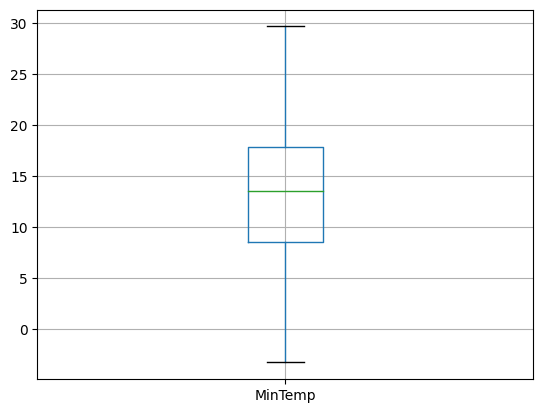

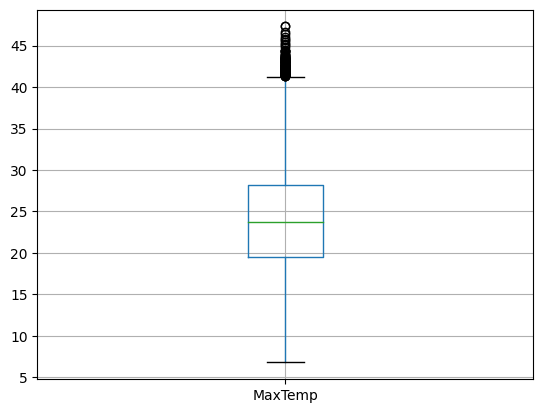

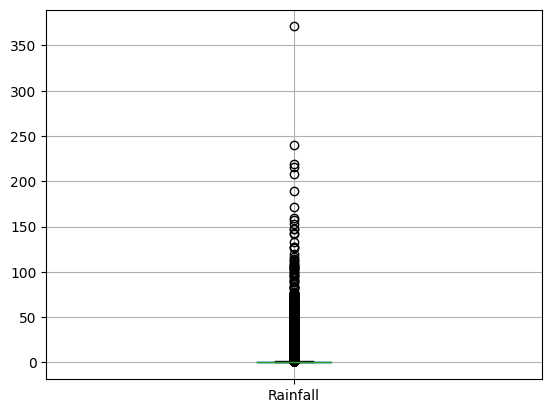

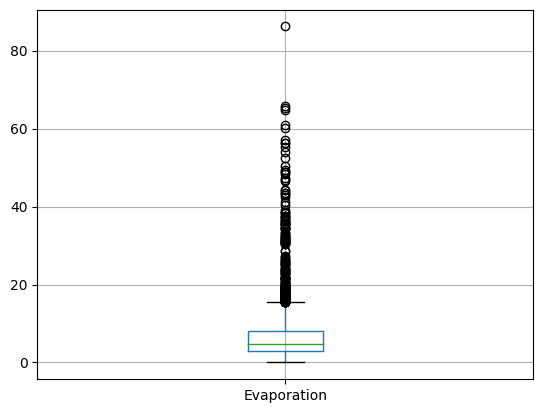

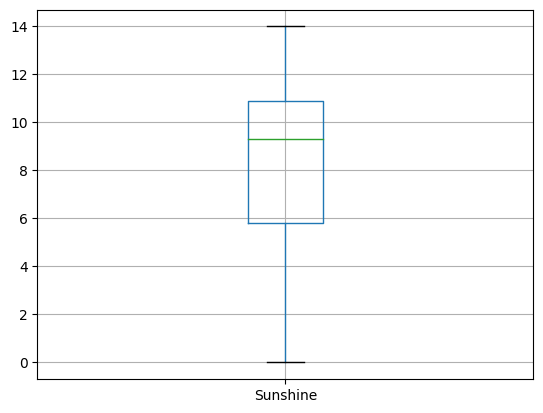

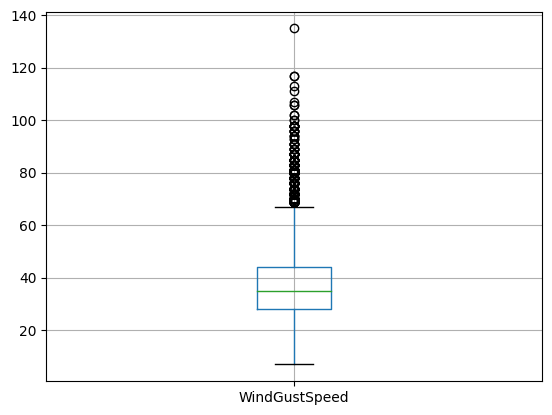

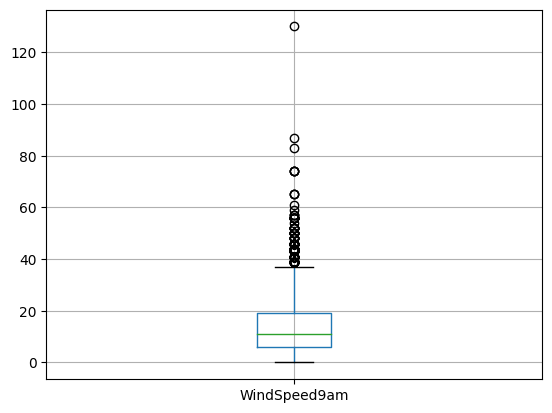

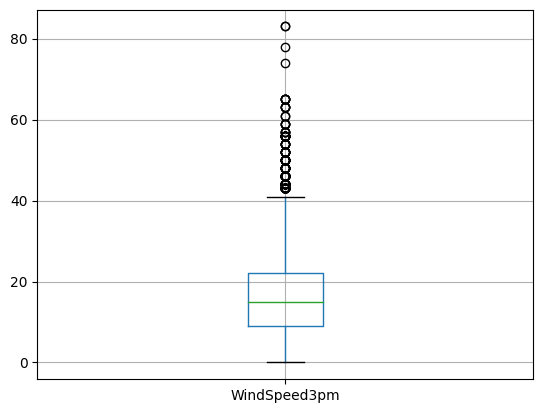

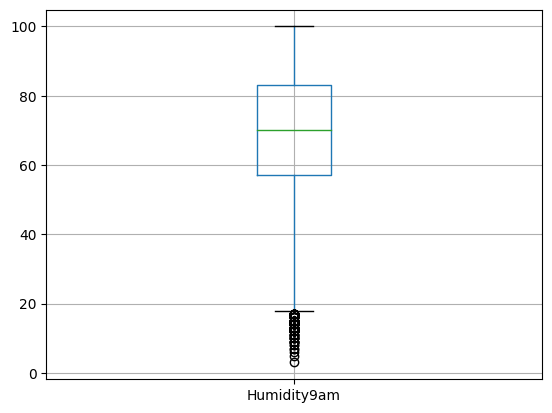

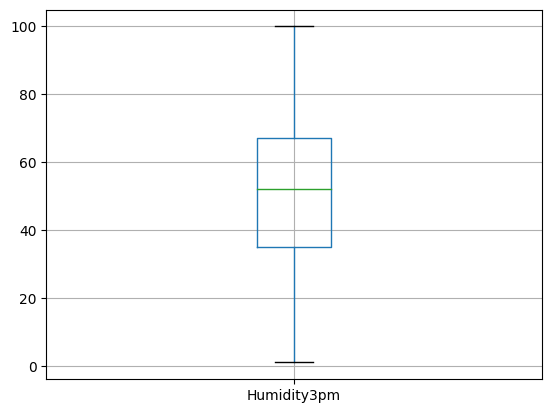

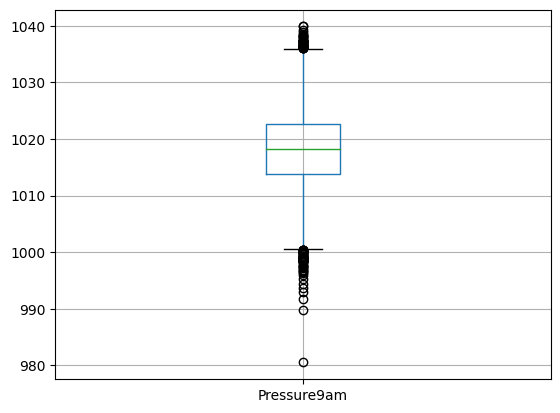

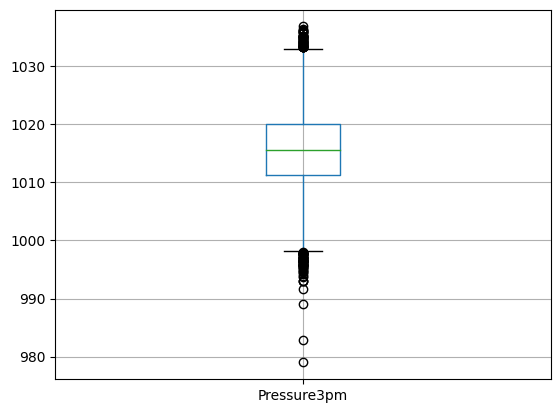

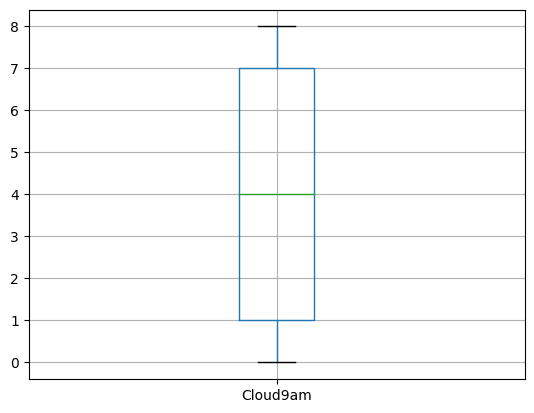

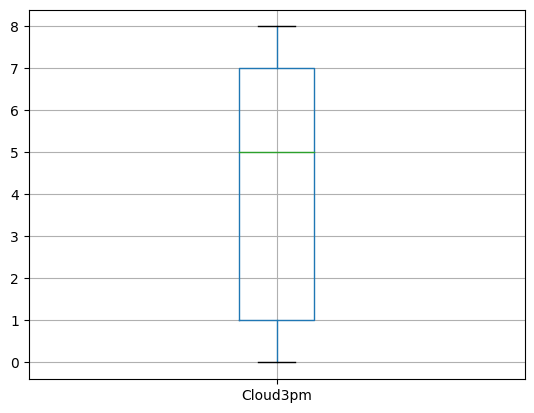

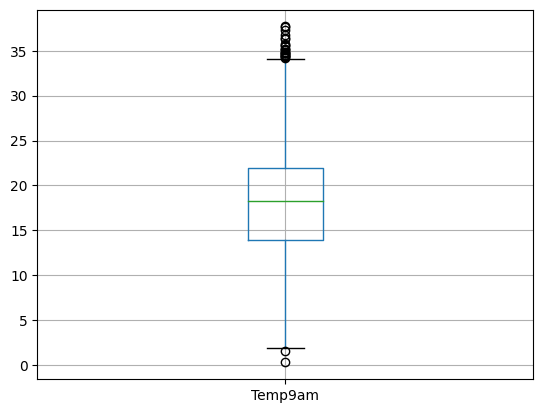

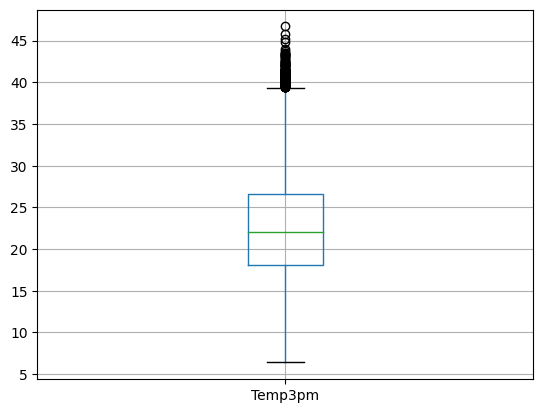

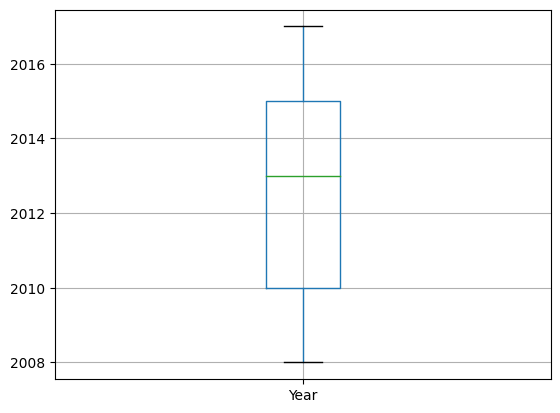

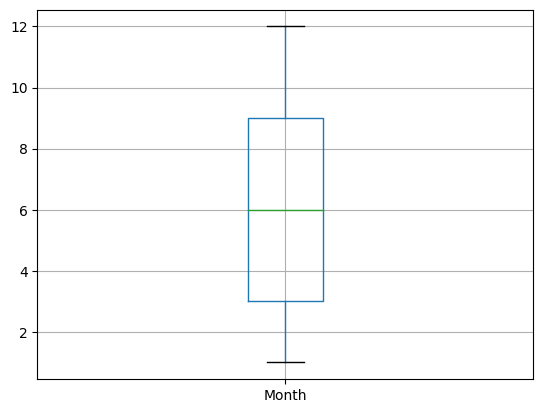

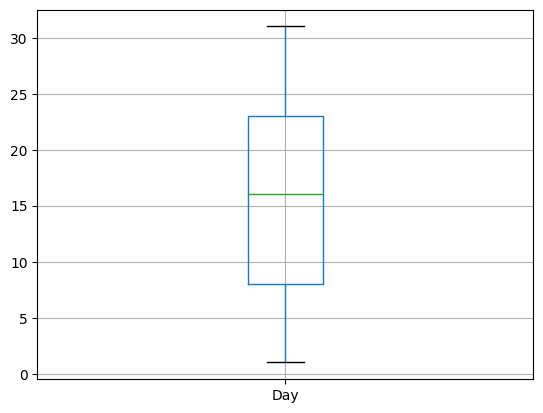

In [ ]:
for i in numerical:
    df.boxplot(column=i)
    plt.show()

Изучив boxplot'ы, поймем, что выборсы содержат следующие переменные: Rainfall, Evaporation, Windspeed9am. Удалим их.

In [ ]:
df.drop(columns = ['Rainfall', 'Evaporation', 'WindSpeed9am'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21900 entries, 0 to 21899
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21900 non-null  object 
 1   MinTemp        21453 non-null  float64
 2   MaxTemp        21573 non-null  float64
 3   Sunshine       4876 non-null   float64
 4   WindGustDir    21900 non-null  object 
 5   WindGustSpeed  18218 non-null  float64
 6   WindDir9am     21900 non-null  object 
 7   WindDir3pm     21900 non-null  object 
 8   WindSpeed3pm   20510 non-null  float64
 9   Humidity9am    21408 non-null  float64
 10  Humidity3pm    20714 non-null  float64
 11  Pressure9am    18310 non-null  float64
 12  Pressure3pm    18314 non-null  float64
 13  Cloud9am       12162 non-null  float64
 14  Cloud3pm       11850 non-null  float64
 15  Temp9am        21551 non-null  float64
 16  Temp3pm        20863 non-null  float64
 17  RainToday      21900 non-null  object 
 18  RainTo

#### 6. [0.5 балла]  Заполните пропуски в числовых признаках.

Нам нужно обновить список числовых переменных.

In [ ]:
numerical = [var for var in df.columns if df[var].dtype!='O']
numerical

['MinTemp',
 'MaxTemp',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

Заполним пропущенные значения средним. Мы уже удалили переменные, содержащие явные выборсы, поэтому среднее отлично сработает.

In [ ]:
numerical_with_null = [feature for feature in numerical if df[feature].isnull().sum()]

simp = SimpleImputer(strategy="most_frequent")
df[numerical_with_null] = simp.fit_transform(df[numerical_with_null])
df[numerical_with_null].head()

,MinTemp,MaxTemp,Sunshine,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.0,44.0,24.0,71.0,22.0,1007.7,1007.1,8.0,1.0,16.9,21.8
1,7.4,25.1,0.0,44.0,22.0,44.0,25.0,1010.6,1007.8,1.0,1.0,17.2,24.3
2,12.9,25.7,0.0,46.0,26.0,38.0,30.0,1007.6,1008.7,1.0,2.0,21.0,23.2
3,9.2,28.0,0.0,24.0,9.0,45.0,16.0,1017.6,1012.8,1.0,1.0,18.1,26.5
4,17.5,32.3,0.0,41.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


Проверим, все ли получилось:

In [ ]:
df[numerical].isnull().sum()

,0
MinTemp,0
MaxTemp,0
Sunshine,0
WindGustSpeed,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0
Pressure9am,0
Pressure3pm,0
Cloud9am,0


#### 7. [0.5 балла] Сделайте нормализацию данных перед обучением.

In [ ]:
from sklearn.preprocessing import StandardScaler
stsc = StandardScaler()
df[numerical] = stsc.fit_transform(df[numerical])
df[numerical].head()

,MinTemp,MaxTemp,Sunshine,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,0.044896,-0.213240,-0.473742,0.566339,0.867851,0.057702,-1.424726,-1.743750,-1.417207,1.917641,-0.689255,-0.187745,-0.164679,-1.844287,1.643198,-1.672414
1,-0.960484,0.137422,-0.473742,0.566339,0.647756,-1.405132,-1.281968,-1.261442,-1.299513,-0.633400,-0.689255,-0.133782,0.250907,-1.844287,1.643198,-1.558689
2,-0.038885,0.233057,-0.473742,0.732926,1.087945,-1.730207,-1.044039,-1.760381,-1.148191,-0.633400,-0.308124,0.549746,0.068049,-1.844287,1.643198,-1.444964
3,-0.658870,0.599658,-0.473742,-1.099531,-0.782858,-1.350953,-1.710241,-0.097251,-0.458838,-0.633400,-0.689255,0.028106,0.616623,-1.844287,1.643198,-1.331240
4,0.731906,1.285042,-0.473742,0.316458,0.427662,0.653671,-0.901282,-1.228180,-1.602156,1.553207,1.978661,-0.025857,1.148574,-1.844287,1.643198,-1.217515


#### 8. [0.5 балла] Обучите логистическую регрессию на полученном датасете.

In [ ]:
from sklearn.linear_model import LogisticRegression
#закодированные категориальные признаки + обработанные числовые
final_df = categorical_df.join(df[numerical])
final_df = final_df.join(df["RainTomorrow"])

imputer = SimpleImputer(strategy = 'most_frequent')
onehot = OneHotEncoder(handle_unknown = 'ignore', drop = 'first', sparse_output = False)

final_df[['RainTomorrow']] = imputer.fit_transform(final_df[['RainTomorrow']])
final_df[['RainTomorrow']] = onehot.fit_transform(final_df[['RainTomorrow']])

y_new = final_df['RainTomorrow']
x_new = final_df.drop(['RainTomorrow'], axis = 1)
X_train_new, X_valid_new, y_train_new, y_valid_new = train_test_split(x_new, y_new, test_size = 0.2, random_state = 42, shuffle = True)

log_reg = LogisticRegression()

log_reg = log_reg.fit(X_train_new, y_train_new)

#### 9. [0.5 балла] Посчитайте accuracy, precision и recall на обучающей и тестовой выборке.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

y_pred_train = log_reg.predict(X_train_new)
y_pred_test = log_reg.predict(X_valid_new)


print(f'Train accuracy = {accuracy_score(y_train_new, y_pred_train)}')
print(f'Test accuracy = {accuracy_score(y_valid_new, y_pred_test)}')

print(f'Train precision =  {precision_score(y_train_new, y_pred_train)}')
print(f'Test recision = {precision_score(y_valid_new, y_pred_test)}')

print(f'Train recall = {recall_score(y_train_new, y_pred_train)}')
print(f'Test recall = {recall_score(y_valid_new, y_pred_test)}')

Train accuracy = 0.8511415525114155
Test accuracy = 0.8515981735159818
Train precision =  0.7244224422442245
Test recision = 0.7137989778534923
Train recall = 0.4751082251082251
Test recall = 0.46503884572697


#### 10. [1 балл] Попробуйте обучить несколько классификаторов, изменяя параметр регуляризации C. Сравните метрики. О чем говорят результаты?

Ответ:

In [166]:
regularization_values = [1e-2, 1e-1, 1, 10, 100, 1000]
for val in regularization_values:
    model = LogisticRegression(C=val)
    model = model.fit(X_train_new, y_train_new)

    y_pred_1 = model.predict(X_train_new)
    y_pred_2 = model.predict(X_valid_new)

    print(f'C = {val}')
    print(f'Разница accuracy = {abs(accuracy_score(y_train_new, y_pred_1) - accuracy_score(y_valid_new, y_pred_2))}',)
    print(f'Разница precision = {abs(precision_score(y_train_new, y_pred_1) - precision_score(y_valid_new, y_pred_2))}')
    print(f'Разница recall = {abs(recall_score(y_train_new, y_pred_1) - recall_score(y_valid_new, y_pred_2))}')


C = 0.01
Разница accuracy = 0.00022831050228311334
Разница precision = 0.015167986747424589
Разница recall = 0.010815303823072941
C = 0.1
Разница accuracy = 0.0007990867579908967
Разница precision = 0.006018909728695343
Разница recall = 0.014321208757945736
C = 1
Разница accuracy = 0.0004566210045662267
Разница precision = 0.01062346439073214
Разница recall = 0.010069379381255072
C = 10
Разница accuracy = 0.0005707762557077833
Разница precision = 0.008892008892008918
Разница recall = 0.011665129173453248
C = 100
Разница accuracy = 0.0004566210045662267
Разница precision = 0.00911854103343468
Разница recall = 0.012206254714578813
C = 1000
Разница accuracy = 0.0004566210045662267
Разница precision = 0.00911854103343468
Разница recall = 0.012206254714578813


По мере увеличения C, разница в метриках становится меньше. Я думаю, что это говорит о том, что модель начинает переобучаться.


Логистическая регрессия предсказывает не просто классы, а их вероятности, поэтому полезно посчитать метрику, не зависящую от выбора порога для классификации:

#### 11. [0.5 балл] Выберите лучшую из получившихся моделей, посчитайте AUC-ROC.

#### 12. [1 балл] Если AUC-ROC > 0.85. Можете продолжать улучшать модель, если это необходимо.

In [ ]:
### Ваш код здесь
### (×_×)

Одним из преимуществ линейных моделей является то, что после обучения можно оценить вклад каждого признака.

#### 13. [0.5 балл] Какие признаки получились самыми важными? Напишите топ-3:
Ответ: Location_NorfolkIsland, Humidity3pm, Pressure3pm

P.S. в этот момент был использован чат гпт: он подсказал мне, как вытянуть коэффиценты из модели логистической регрессии. По сути я использовала его в качестве умного поисковика.

In [ ]:
coefficients = log_reg.coef_[0]
features = log_reg.feature_names_in_

feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)

print(feature_importance)

                   Feature  Coefficient  Absolute Coefficient
6   Location_NorfolkIsland    -1.363991              1.363991
59             Humidity3pm     1.355419              1.355419
61             Pressure3pm    -1.134804              1.134804
60             Pressure9am     1.038370              1.038370
5       Location_NorahHead    -1.000215              1.000215
..                     ...          ...                   ...
58             Humidity9am    -0.013091              0.013091
26          WindDir9am_NNE    -0.008917              0.008917
15          WindGustDir_SE    -0.007092              0.007092
68                     Day    -0.003959              0.003959
30           WindDir9am_SE     0.003530              0.003530

[69 rows x 3 columns]


#### Поделитесь впечатлениями от выполнения задания: КЛАСС

Рекоммендация сериала: мне нравится сериал "Кремниевая долина". Он про смешных гениев-программистов, которые постоянно вляпываются в неприятности. А еще там крутая озвучка от КубикВКубе.
[Приколы (там матюки!)](https://www.youtube.com/watch?v=OVEIZPL_tPI)